In [125]:
!gdown 15onURtF5LLLOkYAvYT3S7DMEEW2KEjpP

Downloading...
From: https://drive.google.com/uc?id=15onURtF5LLLOkYAvYT3S7DMEEW2KEjpP
To: /content/Amazon_Customer.csv
100% 173k/173k [00:00<00:00, 93.6MB/s]


##Import Libraries and Load the Data

In [126]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Amazon_Customer.csv')

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [127]:
# Show the first few rows
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


##Data Exploration

We find the missing values of each column in order to determine if we need to impute anything or remove some columns.

In [128]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing values in each column:\n", missing_values)

# Get an overview of the data types
print("\nData types of each column:\n", df.dtypes)

Missing values in each column:
 Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0


We summarize our columns into a numerical summary. Furthermore, for the categorical columns, we find the distinct values they contain, like "Yes", "No", or "Maybe". Of particular interest we find, is the Purchase Categories column which contain many repeating entries which is complicated by the semicolon separating the values. Example:
'Beauty and Personal Care' 'Clothing and Fashion'
 'Groceries and Gourmet Food;Clothing and Fashion'
 'Beauty and Personal Care;Clothing and Fashion;others'
 'Beauty and Personal Care;Clothing and Fashion'

In [129]:
# Generate summary statistics for numerical columns
print(df.describe())

# For categorical columns, let's check the unique values
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nUnique values in '{col}':\n", df[col].unique())

              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max          

##Data Cleaning and Preprocessing

We first do some basic cleaning, filling the NA values for categorical columns with Unknown, and imputing any missing values for the numerical columns with the median.

In [130]:
# Fill missing categorical columns with 'Unknown' or a placeholder value
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# For numeric columns, fill missing values with the median (for example)
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

We also convert the timestamp to the proper format

In [131]:
# Convert the Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Check for any invalid datetime entries
invalid_dates = df['Timestamp'].isna().sum()
print(f"Number of invalid dates: {invalid_dates}")

Number of invalid dates: 0


<ipython-input-131-b81578076c7b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Finally, we deal with the semicolon, replacing the Purchase Categories column with several new columns for each of the purchase categories separated by the columns using multi-hot encoding.

In [132]:
# Step 1: Standardize categories by stripping whitespace and ensuring lowercase for consistency
df['Purchase_Categories'] = df['Purchase_Categories'].str.strip().str.lower()

# Step 2: Split the categories into multiple columns by using the semicolon (;) as a separator
# Create a set of all unique categories
all_categories = set()
df['Purchase_Categories'].apply(lambda x: all_categories.update(x.split(';')))

# Convert the set to a sorted list (for consistency and to make column creation easier)
all_categories = sorted(all_categories)

# Step 3: Create a new dataframe with multi-hot encoding for each category
for category in all_categories:
    # For each category, create a new column where 1 indicates the category is present, 0 otherwise
    df[f'cat_{category}'] = df['Purchase_Categories'].apply(lambda x: 1 if category in x else 0)

# Step 4: Drop the original 'Purchase_Categories' column since we now have encoded columns
df = df.drop(columns=['Purchase_Categories'])

df.columns = df.columns.str.strip()

# Step 5: Display the first few rows of the cleaned dataset
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,cat_beauty and personal care,cat_clothing and fashion,cat_groceries and gourmet food,cat_home and kitchen,cat_others
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Yes,1,1,Competitive prices,Reducing packaging waste,1,0,0,0,0
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Sometimes,3,2,Wide product selection,Reducing packaging waste,0,1,0,0,0
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,No,Few times a month,Keyword,Multiple pages,2,Yes,...,No,3,3,Competitive prices,Product quality and accuracy,0,1,1,0,0
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,3,4,Competitive prices,Product quality and accuracy,1,1,0,0,1
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Yes,2,2,Competitive prices,Product quality and accuracy,1,1,0,0,0


##Exploratory Data Visualization and Analysis

We first do some exploratory data visualization: here is the age distribution of the customers of Amazon. We see that they are mostly in their late 20's, though there is a tail of old people in their 60's and 70's.

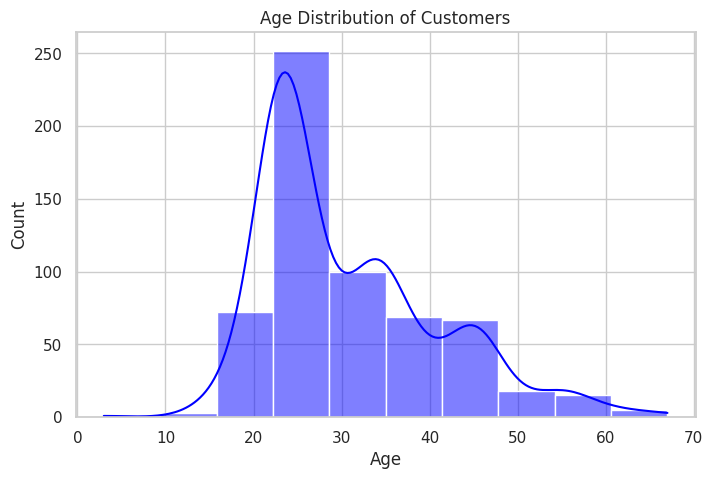

In [133]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Let's visualize the distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most of the customers are female; in fact more than double male. A large minority of customers 'prefer not to say'.

<ipython-input-134-ee9f6176586d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, order=gender_order, palette='Set2')


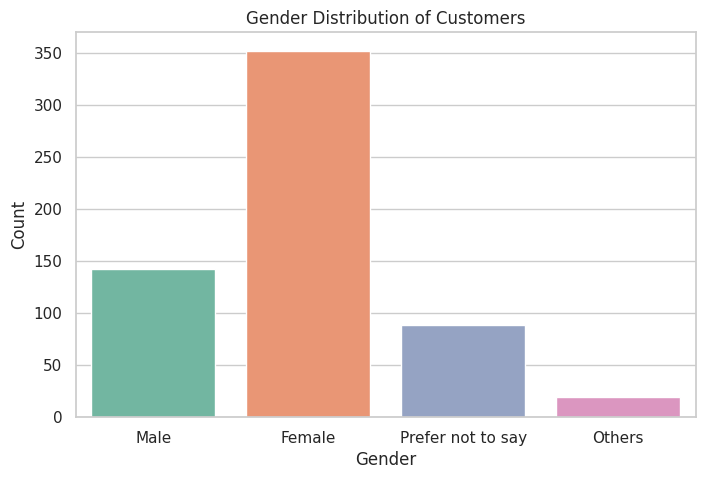

In [134]:
# Bar plot for gender distribution
plt.figure(figsize=(8, 5))
gender_order = [
    'Male',
    'Female',
    'Prefer not to say',
    'Others'
]
sns.countplot(x='Gender', data=df, order=gender_order, palette='Set2')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Most customers purchase only a few times a month, with only a few being very active purchasers at multiple times a week.

<ipython-input-135-1ad8395d6df9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchase_Frequency', data=df, order=custom_order, palette='coolwarm')


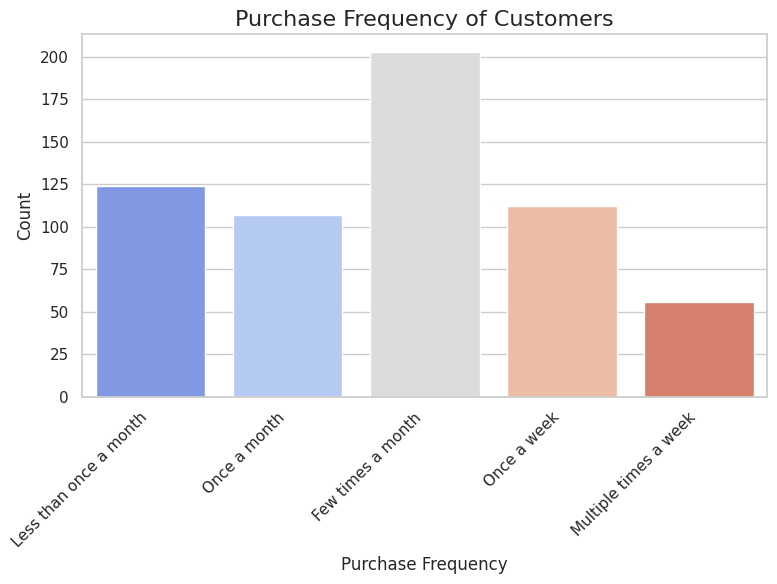

In [135]:
# Define a custom order for the purchase frequency categories
custom_order = [
    'Less than once a month',
    'Once a month',
    'Few times a month',
    'Once a week',
    'Multiple times a week'
]

plt.figure(figsize=(8, 6))
sns.countplot(x='Purchase_Frequency', data=df, order=custom_order, palette='coolwarm')
plt.title('Purchase Frequency of Customers', fontsize=16)
plt.xlabel('Purchase Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

People mostly buy in 'Clothing and Fashion' or "Beauty and Personal Care" and least in 'Groceries and Gourmet Food'.

<ipython-input-136-eaee9a2ac2d9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sums.index, y=category_sums.values, palette='coolwarm')


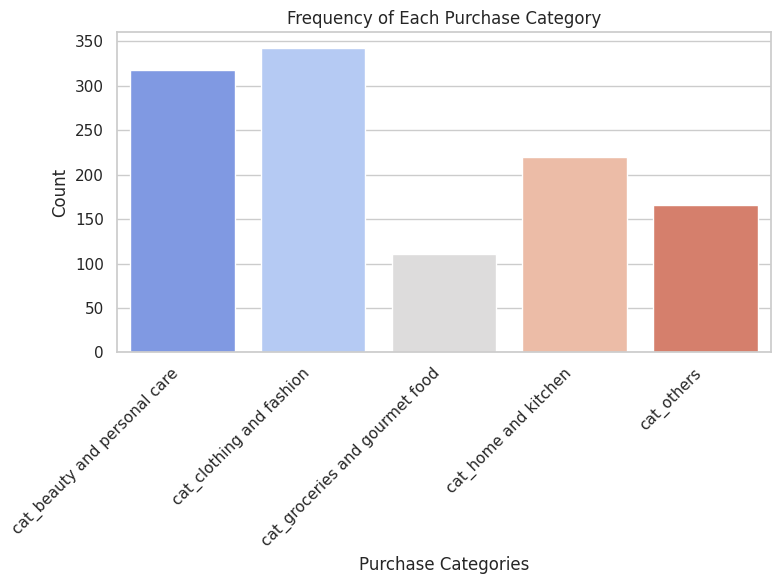

In [136]:
# Step 1: Calculate the sum of each category column to get the frequency
category_sums = df[[f'cat_{category}' for category in all_categories]].sum()

# Step 2: Plot a bar chart showing the frequency of each category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sums.index, y=category_sums.values, palette='coolwarm')

plt.title('Frequency of Each Purchase Category')
plt.xlabel('Purchase Categories')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The strongest correpation in purchase pairs is between "Groceries and Gourmet Food" and "Home and Kitchen" which makes some sense. Otherwise the relationship between categories is quite weak.

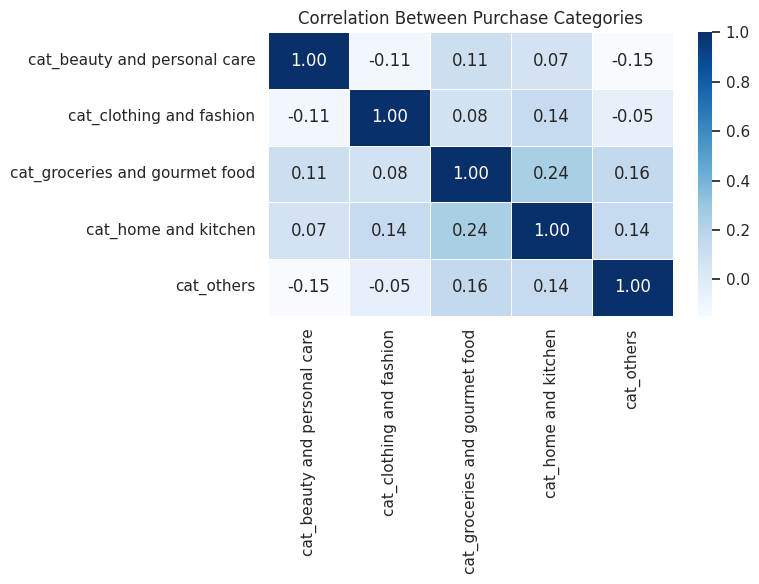

In [137]:
# Step 1: Calculate the correlation matrix between the category columns
category_corr = df[[f'cat_{category}' for category in all_categories]].corr()

# Step 2: Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(category_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

plt.title('Correlation Between Purchase Categories')
plt.tight_layout()
plt.show()

This is a stacked plot of satisfaction, but due to differing purchase numbers it can be hard to compare...

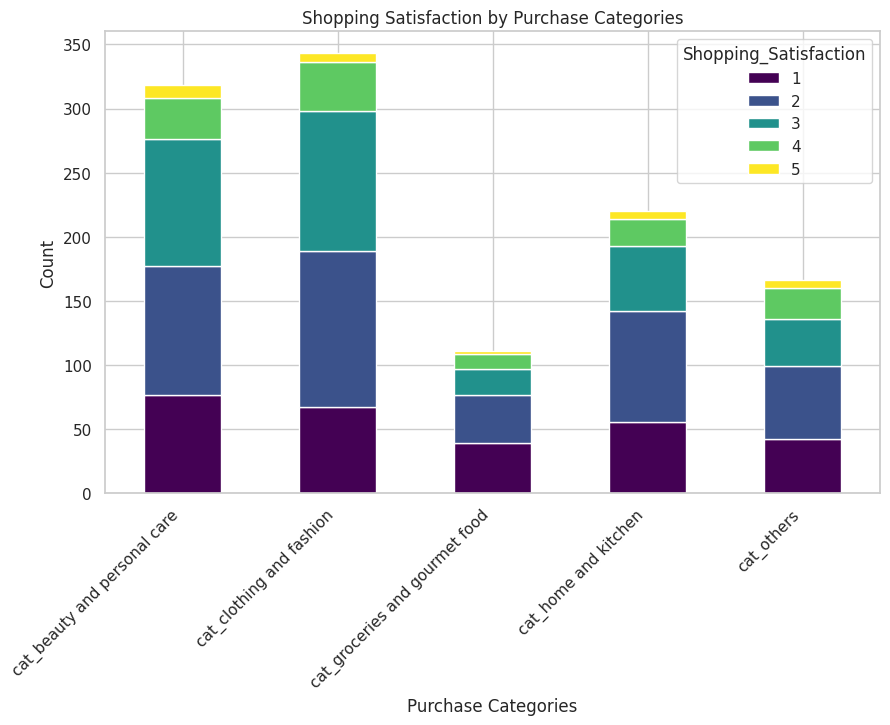

In [138]:
# Step 1: Aggregate shopping satisfaction for each category
satisfaction_by_category = df.groupby('Shopping_Satisfaction')[[f'cat_{category}' for category in all_categories]].sum()

# Step 2: Plot a stacked bar chart
satisfaction_by_category.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Shopping Satisfaction by Purchase Categories')
plt.xlabel('Purchase Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

So we normalize the categories and find that Groceries and Gourmet Food seems to have quite good ratings compared to the other categories. Perhaps this is related to how it has the least purchases; perhaps those who purchase Gourmet Food are purchasing purely high quality products and so the rating is naturally higher as an effect?

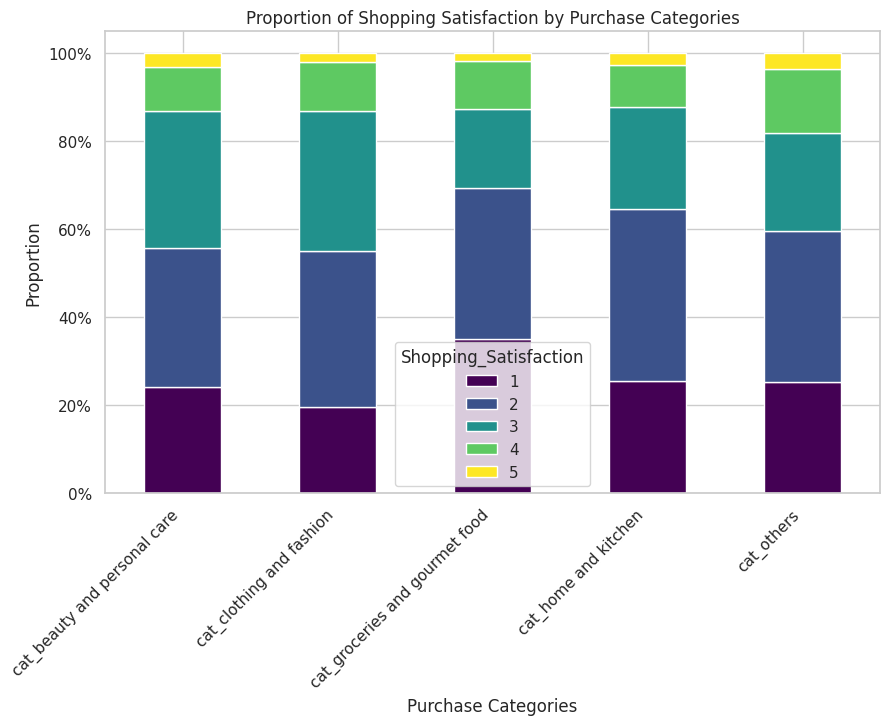

In [139]:
# Step 1: Aggregate shopping satisfaction for each category
satisfaction_by_category = df.groupby('Shopping_Satisfaction')[[f'cat_{category}' for category in all_categories]].sum()

# Step 2: Normalize the counts by the total for each 'Shopping_Satisfaction' to get proportions
satisfaction_by_category_normalized = satisfaction_by_category.div(satisfaction_by_category.sum(axis=0), axis=1)

# Step 3: Plot a normalized stacked bar chart
satisfaction_by_category_normalized.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Proportion of Shopping Satisfaction by Purchase Categories')
plt.xlabel('Purchase Categories')
plt.ylabel('Proportion')

# Ensure the y-axis is labeled as percentages
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.xticks(rotation=45, ha='right')
plt.show()

Those who only search in the first page of their search tend to have a slightly higher rating accuracy, though this effect may not be significant.

<ipython-input-140-41b798b28f53>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_search_exploration.index, y=accuracy_by_search_exploration.values, palette='coolwarm')


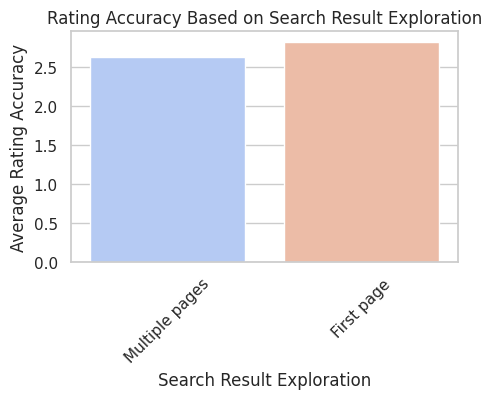

In [140]:
# Group by Search_Result_Exploration and calculate the average Rating Accuracy
plt.figure(figsize=(5, 3))
accuracy_by_search_exploration = df.groupby('Search_Result_Exploration')['Rating_Accuracy'].mean().sort_values()
sns.barplot(x=accuracy_by_search_exploration.index, y=accuracy_by_search_exploration.values, palette='coolwarm')
plt.title('Rating Accuracy Based on Search Result Exploration')
plt.xlabel('Search Result Exploration')
plt.ylabel('Average Rating Accuracy')
plt.xticks(rotation=45)
plt.show()

The most common reason for a customer to abandon their cart is that they found a better price elsewhere (makes sense), or changed their mind. High shipping costs is surprisingly much less of a factor; so Amazon should focus more on discounts than lowering shipping costs.

<ipython-input-141-bc3b831f92e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cart_Abandonment_Factors', data=df, order=df['Cart_Abandonment_Factors'].value_counts().index, palette='pastel')


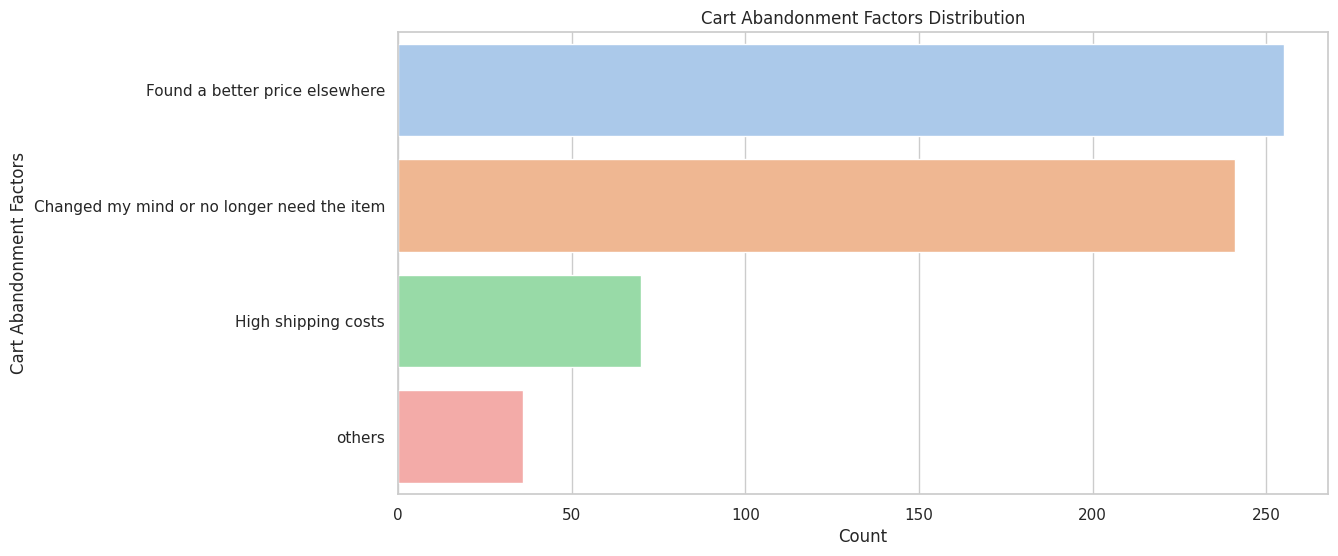

In [141]:
# Plot the distribution of cart abandonment factors
plt.figure(figsize=(12, 6))
sns.countplot(y='Cart_Abandonment_Factors', data=df, order=df['Cart_Abandonment_Factors'].value_counts().index, palette='pastel')
plt.title('Cart Abandonment Factors Distribution')
plt.xlabel('Count')
plt.ylabel('Cart Abandonment Factors')
plt.show()

##Clustering Analysis

Before we can begin our clustering analysis, we have to transform the dataset so that the models can process the categorical features. We therefore use one-hot and multi-hot encoding depending on how many choices the columns have.

In [142]:
# Convert categorical variables into numerical form using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the shape of the dataset after encoding
print("Shape of dataset after encoding:", df_encoded.shape)

df_encoded.columns = df_encoded.columns.str.strip()

# Display the first few rows of the encoded dataset
df_encoded.head()

Shape of dataset after encoding: (602, 75)


,Timestamp,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,cat_beauty and personal care,cat_clothing and fashion,cat_groceries and gourmet food,cat_home and kitchen,...,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges
0,2023-06-04 13:28:19-05:30,23,1,2,1,1,1,0,0,0,...,False,False,False,True,False,False,False,False,False,False
1,2023-06-04 14:30:44-05:30,23,1,2,3,2,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False
2,2023-06-04 17:04:56-05:30,24,2,4,3,3,0,1,1,0,...,False,True,False,False,False,False,False,False,False,False
3,2023-06-04 17:13:00-05:30,24,5,3,3,4,1,1,0,0,...,False,True,False,False,False,False,False,False,False,False
4,2023-06-04 17:28:06-05:30,22,1,4,2,2,1,1,0,0,...,False,True,False,False,False,False,False,False,False,False


The clustering models can't read DateTime so we remove Timestamp specifically. We also make sure the df is clean before inputting it to the clustering models

In [143]:
# Drop the Timestamp column from df_encoded
df_for_clustering = df_encoded.drop(columns=['Timestamp'])

In [144]:
# Check for missing values
print(df_for_clustering.isnull().sum())

# Handle missing values if needed (e.g., filling or dropping)
df_for_clustering = df_for_clustering.dropna()  # or use imputation

age                                                                  0
Customer_Reviews_Importance                                          0
Personalized_Recommendation_Frequency                                0
Rating_Accuracy                                                      0
Shopping_Satisfaction                                                0
                                                                    ..
Improvement_Areas_Shipping speed and reliability                     0
Improvement_Areas_UI                                                 0
Improvement_Areas_User interface                                     0
Improvement_Areas_User interface of app                              0
Improvement_Areas_better app interface and lower shipping charges    0
Length: 74, dtype: int64


After some scaling we try to input it preliminarily into a hierarchal clustering model, which reveals it finds two main clusters. However, I wonder if it is possible to achieve greater discrimination; the information content of just 2 clusters is quite low.

In [145]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_for_clustering)

# Convert back to DataFrame for consistency
df_scaled = pd.DataFrame(df_scaled, columns=df_for_clustering.columns)

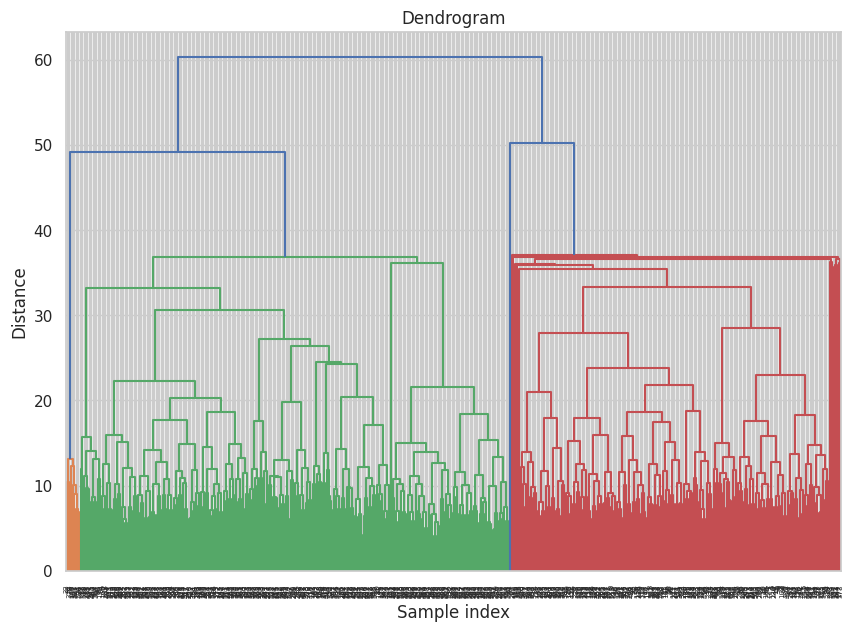

In [146]:
import scipy.cluster.hierarchy as sch

# Compute the distance matrix
distance_matrix = sch.distance.pdist(df_scaled)

# Perform hierarchical clustering
linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

We settle on using KMeans clustering evaluated by a silhouette score. For a silhouette score, higher is better. We see that the configurations for 2-4 clusters can make sense, but gains drop rapidly after that; in other words, there is no point using 5 or more clusters. For maximum information content, we experiment with using n_clusters=4.

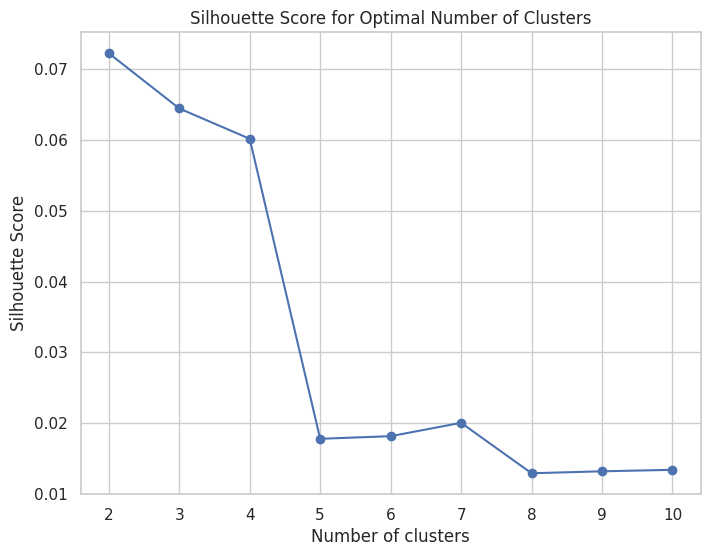

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of possible cluster numbers
range_n_clusters = range(2, 11)

# List to hold the silhouette scores
sil_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, clusters)
    sil_scores.append(sil_score)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [148]:
# Initialize and fit the K-Means algorithm
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster assignments to the original DataFrame
df_encoded['Cluster'] = clusters

# Check the result
df_encoded.head()

,Timestamp,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,cat_beauty and personal care,cat_clothing and fashion,cat_groceries and gourmet food,cat_home and kitchen,...,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,Cluster
0,2023-06-04 13:28:19-05:30,23,1,2,1,1,1,0,0,0,...,False,False,True,False,False,False,False,False,False,2
1,2023-06-04 14:30:44-05:30,23,1,2,3,2,0,1,0,0,...,False,False,True,False,False,False,False,False,False,1
2,2023-06-04 17:04:56-05:30,24,2,4,3,3,0,1,1,0,...,True,False,False,False,False,False,False,False,False,1
3,2023-06-04 17:13:00-05:30,24,5,3,3,4,1,1,0,0,...,True,False,False,False,False,False,False,False,False,0
4,2023-06-04 17:28:06-05:30,22,1,4,2,2,1,1,0,0,...,True,False,False,False,False,False,False,False,False,1


We visualize our cluster configuration by using dimensionality reduction. We see that there is quite good separation between the clusters. It seems cluster 3 is the cluster for outliers. However, is there a more rigorous method to do so?

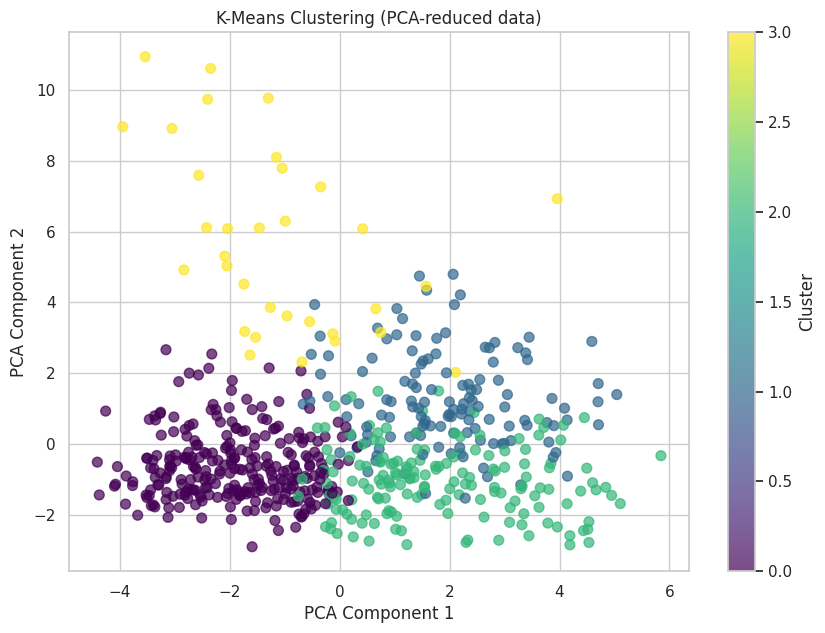

In [149]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA components and cluster assignments
df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_df['Cluster'] = df_encoded['Cluster']

# Plot the results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca_df['PCA1'], df_pca_df['PCA2'], c=df_pca_df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

##Random Forest Discriminator Model

I wrote a scientific paper once where we had a similar classification problem in biology. One way to discriminate between classes and see if your classes are decently separated is surprisingly simple: see if a supervised learner can discriminate between the classes. Additionaly, we like to use Random Forests because it can find Feature Importances, that is, the features that are most useful to distinguishing each class (which is a cluster in this context).

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare feature and label data
X = df_scaled  # Features
y = df_encoded['Cluster']  # Clusters as labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We see from the classification report that accuracy is generally quite good (0.88) and while some classes ay have minor issues with either false positives or negatives, the discrimination is generally quite strong (>0.8).

In [151]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        81
           1       0.85      0.92      0.88        37
           2       0.95      0.79      0.86        52
           3       1.00      0.45      0.62        11

    accuracy                           0.88       181
   macro avg       0.92      0.79      0.82       181
weighted avg       0.89      0.88      0.88       181


Confusion Matrix:
[[80  0  1  0]
 [ 2 34  1  0]
 [ 8  3 41  0]
 [ 3  3  0  5]]


The strong point about a random forest is that it can rank the important features that were used to discriminate between the classes. This is what separates each customer segment the most. We see that the important factors include if they browsed while adding to cart (#1), if they thought the reviews were helpful (#4), and how satisfied they were with the shopping experience (#7), amongst other factors

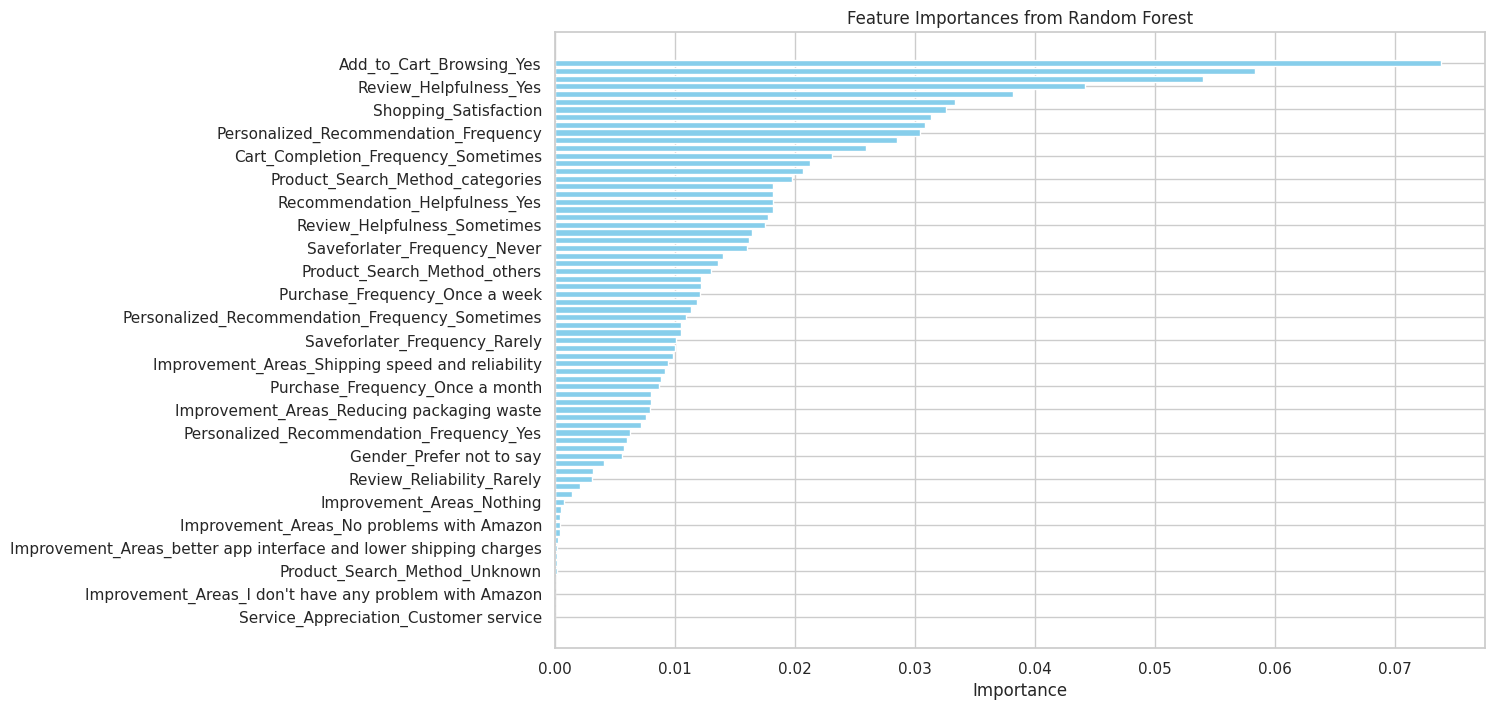

In [152]:
# Get feature importances from the Random Forest model
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': df_encoded.drop(columns=['Timestamp', 'Cluster']).columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # To display the most important features on top

# Adjust y-axis labels to show every 3rd label
y_labels = plt.gca().get_yticks()
plt.gca().set_yticks(y_labels[::3])
plt.gca().set_yticklabels([feature_importances['Feature'].iloc[int(i)] for i in y_labels[::3]])
plt.show()

In [153]:
# We already have the feature importances sorted from the previous step.
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Show the top features
print("Top features that differentiate the clusters:")
print(feature_importances_sorted.head(10))  # Display the top 10 features

Top features that differentiate the clusters:
                                      Feature  Importance
28                   Add_to_Cart_Browsing_Yes    0.073812
1                 Customer_Reviews_Importance    0.058349
13  Purchase_Frequency_Less than once a month    0.054032
46                     Review_Helpfulness_Yes    0.044179
0                                         age    0.038191
22              Product_Search_Method_Keyword    0.033321
4                       Shopping_Satisfaction    0.032557
30            Cart_Completion_Frequency_Often    0.031299
3                             Rating_Accuracy    0.030800
2       Personalized_Recommendation_Frequency    0.030379


##Creating a profile for each segment

We try to find the dominant characteristics of each cluster/segment based on their centroids, but because of the nature of multihot encoding where there are only a few discrete scaled values the information can be a little bit obscured

In [154]:
# Access the cluster centroids
centroids = kmeans.cluster_centers_

# Convert centroids to DataFrame for easier viewing
centroids_df = pd.DataFrame(centroids, columns=df_encoded.drop(columns=['Timestamp', 'Cluster']).columns)

# Add cluster labels to the centroids DataFrame
centroids_df['Cluster'] = range(4)

# Display the centroids
centroids_df

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,cat_beauty and personal care,cat_clothing and fashion,cat_groceries and gourmet food,cat_home and kitchen,cat_others,...,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges,Cluster
0,0.112286,0.325016,0.152069,0.197562,0.292362,0.045784,-0.037714,-0.127254,-0.167742,-0.355701,...,-0.325910,-0.040791,0.215219,-0.040791,-0.226520,-0.040791,-0.040791,-0.040791,-0.040791,0
1,-0.441896,-0.405379,0.112815,-0.018097,-0.126150,-0.232422,-0.164040,-0.337676,-0.204074,0.151634,...,0.457124,-0.040791,-0.238128,-0.040791,0.402624,-0.040791,0.146660,0.146660,0.146660,1
2,0.106163,-0.353890,-0.536988,-0.538081,-0.590917,0.248797,0.290133,0.546563,0.456681,0.242563,...,0.203099,-0.040791,-0.135695,-0.040791,-0.045537,0.108941,-0.040791,-0.040791,-0.040791,2
3,0.294280,0.669341,0.958192,1.105576,1.009969,-0.693950,-0.477540,-0.319185,-0.066690,1.145989,...,-0.117947,0.703333,-0.167316,0.703333,0.508813,-0.040791,-0.040791,-0.040791,-0.040791,3


What if we look at how the values vary within each important feature? We see that cluster 2 has a lot of people adding to cart browsing. But can we really make this graph for all features? That seems cumbersome.

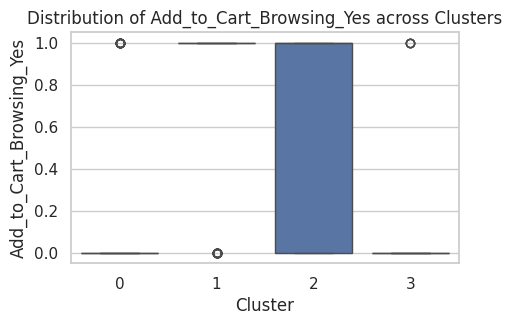

In [155]:
# Example: Visualizing distribution of top feature across clusters
top_feature = feature_importances_sorted['Feature'].iloc[0]  # Get the top feature

plt.figure(figsize=(5, 3))
sns.boxplot(x=df_encoded['Cluster'], y=df_encoded[top_feature])
plt.title(f"Distribution of {top_feature} across Clusters")
plt.show()

Here's a better idea. We aggregate the dataframe by clusters just like we would in SQL, and we compare the summary statistics.

In [156]:
# Get summary statistics of clusters for all features
cluster_stats = df_encoded.groupby('Cluster').mean()

# Display the statistics
cluster_stats.T

Cluster,0,1,2,3
Timestamp,2023-06-09 07:39:09.704379648-05:30,2023-06-06 12:39:34.610686976-05:30,2023-06-08 07:29:11.054877952-05:30,2023-06-07 22:03:53.272727296-05:30
age,31.934307,26.290076,31.871951,33.787879
Customer_Reviews_Importance,2.864964,2.0,2.060976,3.272727
Personalized_Recommendation_Frequency,2.857664,2.816794,2.140244,3.69697
Rating_Accuracy,2.850365,2.656489,2.189024,3.666667
...,...,...,...,...
Improvement_Areas_Shipping speed and reliability,0.054745,0.267176,0.115854,0.30303
Improvement_Areas_UI,0.0,0.0,0.006098,0.0
Improvement_Areas_User interface,0.0,0.007634,0.0,0.0
Improvement_Areas_User interface of app,0.0,0.007634,0.0,0.0


We try to plot the different statistics, but there's a problem! Age dominates over all other categories because it is so much larger than other values.

<ipython-input-157-a3f8149945ee>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_data.index, y=cluster_data.values, palette='viridis', ax=ax)
<ipython-input-157-a3f8149945ee>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cluster_data.index, rotation=45, ha='right', fontsize=10)
<ipython-input-157-a3f8149945ee>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_data.index, y=cluster_data.values, palette='viridis', ax=ax)
<ipython-input-157-a3f8149945ee>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cluster_data.index, rotation=45, ha='right', fontsize=10)
<ipython

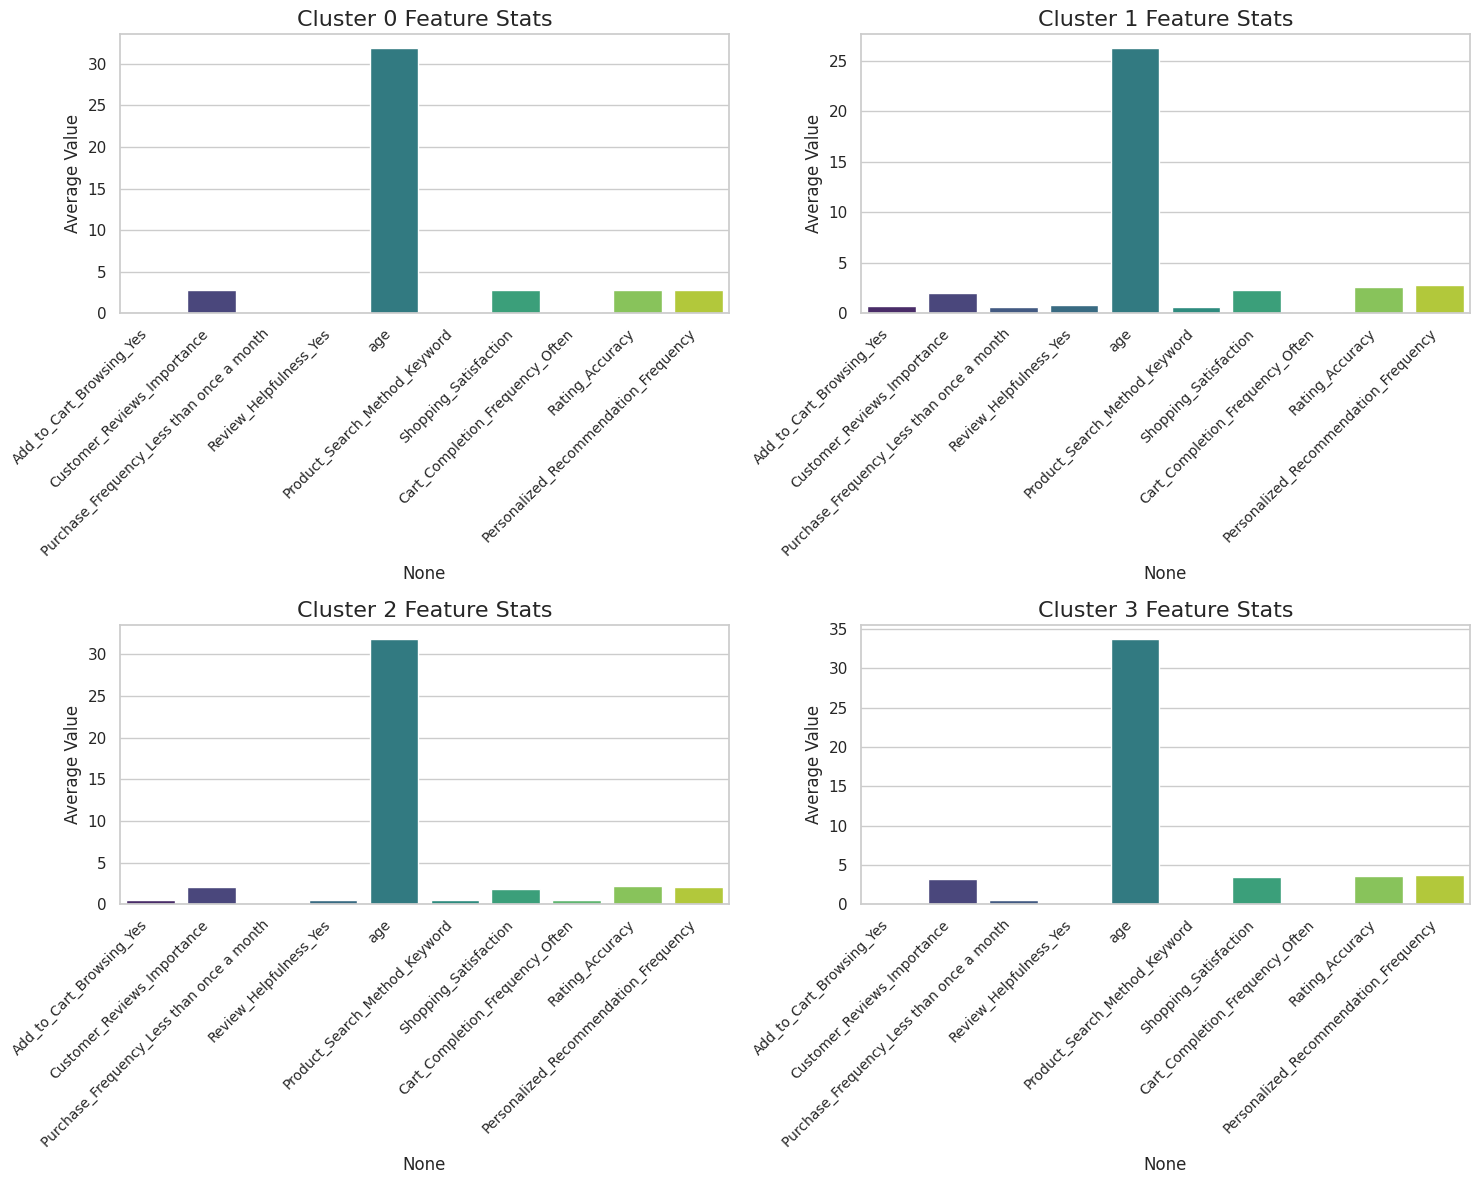

In [157]:
# Define how many important features you want to visualize (let's take top 10)
top_n_features = 10

# Extract the feature names from the sorted importance
important_features = feature_importances_sorted[:top_n_features]['Feature']

# Group data by clusters and calculate the mean for each feature within each cluster
cluster_stats = df_encoded.groupby('Cluster').mean()

# Set up subplots to create 4 graphs for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# For each cluster, plot the feature statistics
for i, cluster in enumerate(cluster_stats.index):
    ax = axes[i]

    # Get the mean values for the selected important features for the current cluster
    cluster_data = cluster_stats.loc[cluster, important_features]

    # Create a bar plot for each cluster
    sns.barplot(x=cluster_data.index, y=cluster_data.values, palette='viridis', ax=ax)

    # Set titles and labels
    ax.set_title(f'Cluster {cluster} Feature Stats', fontsize=16)
    ax.set_ylabel('Average Value', fontsize=12)
    ax.set_xticklabels(cluster_data.index, rotation=45, ha='right', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

We fix this by comparing each feature on a common scale, normalizing it to a scale of [0,1]. Here we see the graph is much more comparable! For example, Clusters 0 is unique in finding reviews to be unhelpful. we can extract some insights on the unique characteristics of each cluster now.

<ipython-input-158-21083898136a>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.index, y=cluster_means.values, palette='viridis', ax=ax)
<ipython-input-158-21083898136a>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cluster_means.index, rotation=45, ha='right', fontsize=10)
<ipython-input-158-21083898136a>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.index, y=cluster_means.values, palette='viridis', ax=ax)
<ipython-input-158-21083898136a>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cluster_means.index, rotation=45, ha='right', fontsize=10)
<i

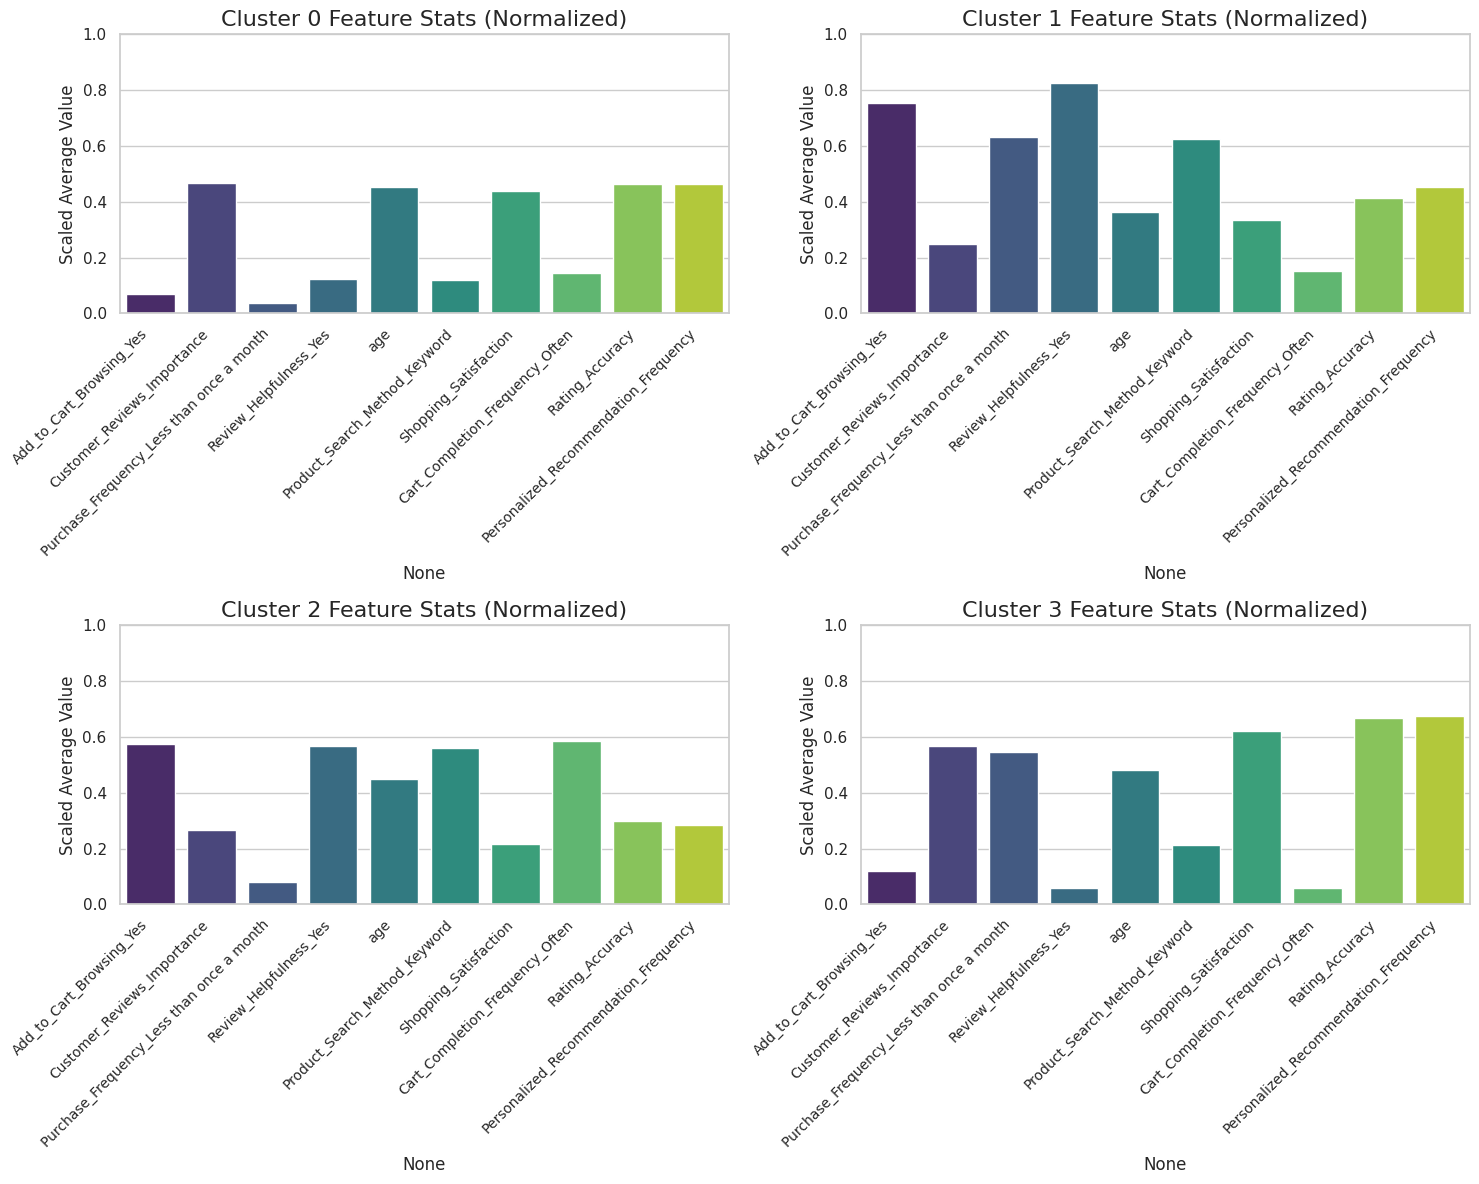

In [158]:
from sklearn.preprocessing import MinMaxScaler

# Define how many important features you want to visualize (let's take top 10)
top_n_features = 10

# Extract the feature names from the sorted importance
important_features = feature_importances_sorted[:top_n_features]['Feature'].tolist()

# Make sure we are selecting the exact feature names from the DataFrame without 'Cluster' suffix
important_features = [feature.replace('Cluster', '').strip() for feature in important_features]

# Select only the important features for the clusters
cluster_data = df_encoded[important_features + ['Cluster']]

# Apply Min-Max Scaling to the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cluster_data[important_features])

# Convert back to DataFrame
cluster_data_scaled = pd.DataFrame(scaled_data, columns=important_features)
cluster_data_scaled['Cluster'] = df_encoded['Cluster'].values

# Group the scaled data by clusters and calculate the mean for each feature within each cluster
cluster_stats_scaled = cluster_data_scaled.groupby('Cluster').mean()

# Set up subplots to create 4 graphs for each cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# For each cluster, plot the feature statistics
for i, cluster in enumerate(cluster_stats_scaled.index):
    ax = axes[i]

    # Get the mean values for the selected important features for the current cluster
    cluster_means = cluster_stats_scaled.loc[cluster, important_features]

    # Create a bar plot for each cluster
    sns.barplot(x=cluster_means.index, y=cluster_means.values, palette='viridis', ax=ax)

    # Set y-axis limits to [0, 1] for consistency
    ax.set_ylim(0, 1)

    # Set titles and labels
    ax.set_title(f'Cluster {cluster} Feature Stats (Normalized)', fontsize=16)
    ax.set_ylabel('Scaled Average Value', fontsize=12)
    ax.set_xticklabels(cluster_means.index, rotation=45, ha='right', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

We also print out the feature values of the important features that distinguish the clusters for reference.

In [159]:
# Print the feature values for each cluster
for cluster in cluster_stats.index:
    print(f"\nCluster {cluster} Feature Values:")
    cluster_data = cluster_stats.loc[cluster, important_features]
    for feature, value in cluster_data.items():
        print(f"{feature}: {value:.2f}")


Cluster 0 Feature Values:
Add_to_Cart_Browsing_Yes: 0.07
Customer_Reviews_Importance: 2.86
Purchase_Frequency_Less than once a month: 0.04
Review_Helpfulness_Yes: 0.12
age: 31.93
Product_Search_Method_Keyword: 0.12
Shopping_Satisfaction: 2.76
Cart_Completion_Frequency_Often: 0.15
Rating_Accuracy: 2.85
Personalized_Recommendation_Frequency: 2.86

Cluster 1 Feature Values:
Add_to_Cart_Browsing_Yes: 0.76
Customer_Reviews_Importance: 2.00
Purchase_Frequency_Less than once a month: 0.63
Review_Helpfulness_Yes: 0.82
age: 26.29
Product_Search_Method_Keyword: 0.63
Shopping_Satisfaction: 2.34
Cart_Completion_Frequency_Often: 0.15
Rating_Accuracy: 2.66
Personalized_Recommendation_Frequency: 2.82

Cluster 2 Feature Values:
Add_to_Cart_Browsing_Yes: 0.57
Customer_Reviews_Importance: 2.06
Purchase_Frequency_Less than once a month: 0.08
Review_Helpfulness_Yes: 0.57
age: 31.87
Product_Search_Method_Keyword: 0.56
Shopping_Satisfaction: 1.87
Cart_Completion_Frequency_Often: 0.59
Rating_Accuracy: 2.19


And here are the modal values of each column by category.

In [160]:
# Add cluster assignments to the original DataFrame
df['Cluster'] = clusters

In [161]:
# Assuming your DataFrame is already loaded as 'df'

# Group the data by 'Cluster'
grouped = df.groupby('Cluster')

# Function to get the most common value for categorical columns
def most_common(series):
    return series.value_counts().index[0]

# Define numeric and categorical columns
numeric_columns = ['age', 'Customer_Reviews_Importance', 'Rating_Accuracy', 'Shopping_Satisfaction']
categorical_columns = ['Gender', 'Purchase_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Cart_Completion_Frequency', 'Saveforlater_Frequency', 'Review_Reliability', 'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas']

# Create personas for each cluster
personas = {}

for cluster, group in grouped:
    persona = {}

    # Aggregate numeric columns
    for col in numeric_columns:
        persona[col] = group[col].mean()

    # Aggregate categorical columns
    for col in categorical_columns:
        persona[col] = most_common(group[col])

    personas[f"Cluster {cluster}"] = persona

# Print personas
for cluster, persona in personas.items():
    print(f"Persona for {cluster}:")
    for key, value in persona.items():
        if isinstance(value, float):
            print(f"{key}: {value:.1f}")
        else:
            print(f"{key}: {value}")
    print("\n")

Persona for Cluster 0:
age: 31.9
Customer_Reviews_Importance: 2.9
Rating_Accuracy: 2.9
Shopping_Satisfaction: 2.8
Gender: Female
Purchase_Frequency: Few times a month
Browsing_Frequency: Few times a week
Product_Search_Method: categories
Search_Result_Exploration: Multiple pages
Cart_Completion_Frequency: Sometimes
Saveforlater_Frequency: Sometimes
Review_Reliability: Occasionally
Recommendation_Helpfulness: Sometimes
Service_Appreciation: Product recommendations
Improvement_Areas: Customer service responsiveness


Persona for Cluster 1:
age: 26.3
Customer_Reviews_Importance: 2.0
Rating_Accuracy: 2.7
Shopping_Satisfaction: 2.3
Gender: Female
Purchase_Frequency: Less than once a month
Browsing_Frequency: Few times a month
Product_Search_Method: Keyword
Search_Result_Exploration: Multiple pages
Cart_Completion_Frequency: Sometimes
Saveforlater_Frequency: Rarely
Review_Reliability: Heavily
Recommendation_Helpfulness: Sometimes
Service_Appreciation: Wide product selection
Improvement_Areas

# Customer Segment Profiles

## Cluster 0: The Frequent, Satisfied Browser

This segment consists primarily of women in their early 30s who are regular and engaged shoppers. They browse the site a few times a week and make purchases a few times a month. These customers value customer reviews highly and find them mostly accurate. They have a moderate level of shopping satisfaction.

This segment represents the core customer base. They are frequent visitors and shoppers, indicating strong brand loyalty. Their high valuation of customer reviews suggests they are influenced by social proof and peer opinions. The moderate satisfaction level (2.76/4) indicates room for improvement in their overall experience.

Key characteristics:
- Age: 31.9 years old
- Gender: Female
- Browsing Frequency: Few times a week
- Purchase Frequency: Few times a month
- Customer Reviews Importance: High (2.86 out of 4)
- Shopping Satisfaction: Above average (2.76 out of 4)
- Often complete their carts
- Appreciate product recommendations
- Occasionally find reviews reliable and recommendations helpful

Areas for improvement: This group would like to see better customer service responsiveness.

## Cluster 1: The Youthful, Infrequent Shopper

This segment is composed of younger women in their mid-20s who shop less frequently but are highly engaged when they do. They rely heavily on customer reviews and often add items to their cart while browsing.

This younger segment shows high engagement during their less frequent visits. Their heavy reliance on reviews and high rate of adding items to cart while browsing (76%) suggests they are impulse shoppers who are strongly influenced by product information and peer opinions. Their appreciation for a wide product selection indicates they value variety and options.

Key characteristics:
- Age: 26.3 years old
- Gender: Female
- Browsing Frequency: Few times a month
- Purchase Frequency: Less than once a month
- Customer Reviews Importance: Moderate (2.0 out of 4)
- Shopping Satisfaction: Moderate (2.34 out of 4)
- Often add to cart while browsing (76% of the time)
- Frequently find reviews helpful (82% of the time)
- Appreciate the wide product selection

Areas for improvement: This group is concerned about product quality and accuracy.

## Cluster 2: The Frequent but Dissatisfied Shopper

This segment consists of women in their early 30s who shop frequently but have the lowest satisfaction levels. They often browse and purchase but seem to have issues with product quality or accuracy.

This segment presents both a challenge and an opportunity. Despite their frequent browsing and purchasing, they have the lowest satisfaction levels. Their concerns about product quality and accuracy, coupled with their appreciation for competitive prices, suggest they might be bargain hunters who feel disappointed when products don't meet their expectations.

Key characteristics:
- Age: 31.9 years old
- Gender: Female
- Browsing Frequency: Few times a week
- Purchase Frequency: Few times a month
- Customer Reviews Importance: Low (2.06 out of 4)
- Shopping Satisfaction: Low (1.87 out of 4)
- Often complete their carts (59% of the time)
- Moderately rely on reviews
- Appreciate competitive prices

Areas for improvement: This group is most concerned about product quality and accuracy.

## Cluster 3: The Selective, Satisfied Male Shopper

This segment is primarily composed of men in their mid-30s who shop infrequently but are highly satisfied when they do. They value customer reviews highly and find ratings to be very accurate.

This segment, though shopping infrequently, shows the highest satisfaction levels. They highly value accurate ratings and reviews, suggesting they do thorough research before making purchases. Their appreciation for the user-friendly interface indicates they value efficiency in their shopping experience.

Key characteristics:
- Age: 33.8 years old
- Gender: Male
- Browsing Frequency: Rarely
- Purchase Frequency: Less than once a month
- Customer Reviews Importance: Very High (3.27 out of 4)
- Shopping Satisfaction: High (3.48 out of 4)
- Rarely add to cart while browsing
- Highly value rating accuracy (3.67 out of 4)
- Appreciate the user-friendly website/app interface

Areas for improvement: This group would like to see improvements in shipping speed and reliability.